# K-Means Clustering Algorithm

![alt text](https://raw.githubusercontent.com/enzoschitini/repository-data-science-library/refs/heads/main/K-Means/img/Clustering%20Algorithm.png)

## **Como funciona o k-means?**

Cada centroide deve estar posicionado na média dos pontos pertencentes ao seu cluster, daí o nome k-means. Ao fazer uma predição, o algoritmo encontra o centroide mais próximo a um novo ponto, utilizando alguma métrica de distância (euclidiana, Manhattan etc). O ponto é então classificado como pertencente ao cluster daquele centroide. Novos pontos não entram na conta da média dos clusters. A posição dos centroides é determinada apenas com base nos dados de treinamento. Para incluir novos pontos, seria necessário re-treinar o modelo.

- Os centroides devem estar posicionados na média dos pontos pertencentes ao seu cluster.
- O algoritmo encontra o centroide mais próximo a um novo ponto ao fazer uma predição.
- Utiliza métricas de distância, como euclidiana ou Manhattan, para determinar a classificação do ponto.
- A posição dos centroides é determinada apenas com base nos dados de treinamento.
- Para incluir novos pontos, seria necessário re-treinar o modelo.

Ao utilizar o algoritmo k-means, é fundamental diferenciar entre a fase de treinamento, em que o modelo ‘aprende’ com os dados, e a fase de inferência, em que classifica novos dados.

- O processo de treinamento é crucial para que o modelo compreenda e se ajuste aos dados fornecidos.
- Durante a fase de inferência, o modelo utiliza o conhecimento adquirido para classificar novos conjuntos de dados.
- Compreender essa distinção é essencial para a aplicação eficaz do algoritmo K-Means em análises de dados.

![image.png](img/clusters.png)

### Importação de bibliotecas essenciais

In [1]:
# Importação de bibliotecas essenciais
import pandas as pd  # Manipulação de dados em DataFrames
import numpy as np  # Operações matemáticas e manipulação de arrays

# Bibliotecas de visualização de dados
import seaborn as sns  # Visualizações estatísticas
import matplotlib.pyplot as plt  # Visualizações estáticas

# Pré-processamento
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Clustering e métricas de distância
from sklearn.cluster import KMeans

# Redução de dimensionalidade e pipelines
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer

# Pesquisa de hiperparâmetros
from sklearn.model_selection import GridSearchCV

# Configuração para exibir todas as colunas
pd.set_option('display.max_columns', None)

# Importação de funções matemáticas específicas
from math import pi  # Utilizado para cálculos envolvendo o número pi

### Visualização do dataset

In [2]:
# Importa o arquivo CSV para um DataFrame do Pandas
df = pd.read_csv('data/df_for_k_means.csv')

# Cria uma cópia de backup do dataset original para preservá-lo
back_up_dataset = df.copy()

# Exibe as primeiras linhas do DataFrame para uma visualização inicial dos dados
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Year,Month,Day,Age,Recency,Complain,Children,FamilySize,IsMarried,SeniorityDays,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalMntSpent,TotalPurchases,AvgPurchaseValue,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedAnyCampaign,Response,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,WebVsStorePurchases,Date,IncomeRange
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,2012,9,4,57,58,0,0,0,0,663,635,88,546,172,88,88,1617,25,64,3,0,0,0,0,0,0,1,8,10,4,7,2,2012-09-04,41 Mil-61 Mil
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,2014,3,8,60,38,0,2,2,0,113,11,1,6,2,1,6,27,6,4,2,0,0,0,0,0,0,0,1,1,2,5,0,2014-03-08,41 Mil-61 Mil
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,2013,8,21,49,26,0,0,1,1,312,426,49,127,111,21,42,776,21,36,1,0,0,0,0,0,0,0,8,2,10,4,0,2013-08-21,61 Mil-82 Mil
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,2014,2,10,30,26,0,1,2,1,139,11,4,20,10,3,5,53,8,6,2,0,0,0,0,0,0,0,2,0,4,6,0,2014-02-10,21 Mil-41 Mil
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,2014,1,19,33,94,0,1,2,1,161,173,43,118,46,27,15,422,19,22,5,0,0,0,0,0,0,0,5,3,6,5,0,2014-01-19,41 Mil-61 Mil


## Preparação dos dados

### Removendo algumas colunas

In [3]:
# Remove as colunas especificadas do DataFrame, modificando o original
df.drop(['Dt_Customer', 'Year', 'Month', 'Day', 'SeniorityDays', 'Date'], axis=1, inplace=True)

# Converte as colunas do tipo 'object' para o tipo 'category' para otimizar o uso de memória
for x in list(df.select_dtypes('object').columns):
    df[x] = df[x].astype('category')

# Exibe a forma do DataFrame (número de linhas e colunas)
print(df.shape)

# Exibe informações gerais sobre o DataFrame, como tipos de dados e contagem de valores não nulos
print(df.info())

# Exibe as primeiras linhas do DataFrame após as modificações
df.head()

(2206, 36)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2206 entries, 0 to 2205
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   2206 non-null   int64   
 1   Year_Birth           2206 non-null   int64   
 2   Education            2206 non-null   category
 3   Marital_Status       2206 non-null   category
 4   Income               2206 non-null   int64   
 5   Kidhome              2206 non-null   int64   
 6   Teenhome             2206 non-null   int64   
 7   Age                  2206 non-null   int64   
 8   Recency              2206 non-null   int64   
 9   Complain             2206 non-null   int64   
 10  Children             2206 non-null   int64   
 11  FamilySize           2206 non-null   int64   
 12  IsMarried            2206 non-null   int64   
 13  MntWines             2206 non-null   int64   
 14  MntFruits            2206 non-null   int64   
 15  MntMeatPro

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Age,Recency,Complain,Children,FamilySize,IsMarried,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalMntSpent,TotalPurchases,AvgPurchaseValue,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedAnyCampaign,Response,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,WebVsStorePurchases,IncomeRange
0,5524,1957,Graduation,Single,58138,0,0,57,58,0,0,0,0,635,88,546,172,88,88,1617,25,64,3,0,0,0,0,0,0,1,8,10,4,7,2,41 Mil-61 Mil
1,2174,1954,Graduation,Single,46344,1,1,60,38,0,2,2,0,11,1,6,2,1,6,27,6,4,2,0,0,0,0,0,0,0,1,1,2,5,0,41 Mil-61 Mil
2,4141,1965,Graduation,Together,71613,0,0,49,26,0,0,1,1,426,49,127,111,21,42,776,21,36,1,0,0,0,0,0,0,0,8,2,10,4,0,61 Mil-82 Mil
3,6182,1984,Graduation,Together,26646,1,0,30,26,0,1,2,1,11,4,20,10,3,5,53,8,6,2,0,0,0,0,0,0,0,2,0,4,6,0,21 Mil-41 Mil
4,5324,1981,PhD,Married,58293,1,0,33,94,0,1,2,1,173,43,118,46,27,15,422,19,22,5,0,0,0,0,0,0,0,5,3,6,5,0,41 Mil-61 Mil


### Normalização dos dados

In [4]:
# Converte a coluna 'ID' para o tipo 'int64'
df['ID'] = df['ID'].astype('int64')

# Seleciona as colunas numéricas (int64 e float64) do DataFrame
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Exclui a coluna 'ID' da lista de características numéricas
features = numerical_cols.drop("ID")

# Cria um objeto do tipo StandardScaler para normalização
scaler = StandardScaler()

# Aplica a normalização nos dados das características (features) e armazena o resultado
X_scaled = scaler.fit_transform(df[features])

## PCA - Principal Component Analysis

### Busca pelo melhor número de componentes

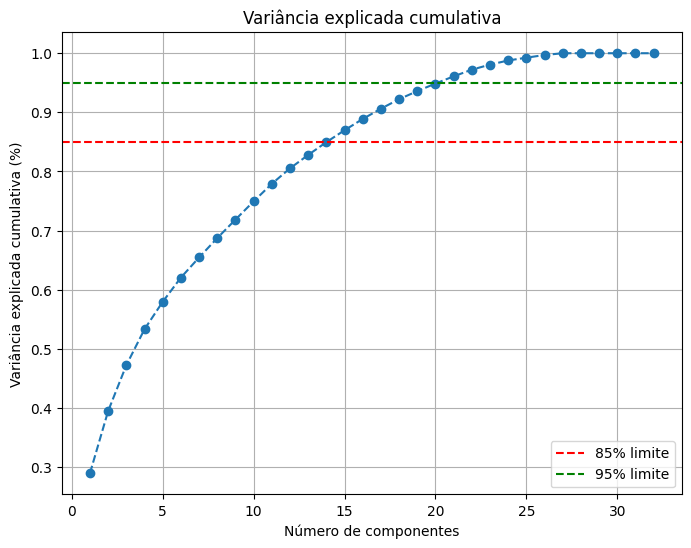

Número de componentes que explicam pelo menos 85% da variância: 15


In [5]:
# Cria um objeto PCA (Análise de Componentes Principais) sem definir o número de componentes
pca_full = PCA()

# Ajusta o PCA aos dados escalados (X_scaled) para calcular os componentes principais
pca_full.fit(X_scaled)

# Obtém a razão de variância explicada por cada componente principal
explained_variance = pca_full.explained_variance_ratio_

# Cria um gráfico para visualizar a variância explicada cumulativa
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker='o', linestyle='--')
plt.title('Variância explicada cumulativa')
plt.xlabel('Número de componentes')
plt.ylabel('Variância explicada cumulativa (%)')

# Adiciona linhas de referência para limites de 85% e 95% de variância explicada
plt.axhline(y=0.85, color='r', linestyle='--', label='85% limite')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% limite')

# Exibe a legenda e o grid
plt.legend()
plt.grid()

# Exibe o gráfico
plt.show()

# Define o limite de variância explicada como 85%
threshold = 0.85

# Encontra o número de componentes necessários para atingir pelo menos 85% de variância explicada
optimal_components = np.argmax(np.cumsum(explained_variance) >= threshold) + 1

# Exibe o número ótimo de componentes
print(f"Número de componentes que explicam pelo menos 85% da variância: {optimal_components}")

### Criando o PCA

In [6]:
# Cria um objeto PCA com 15 componentes principais e define uma semente aleatória para reprodutibilidade
pca = PCA(random_state=42, n_components=15)

# Aplica o PCA aos dados escalados e obtém as componentes principais
principal_components = pca.fit_transform(X_scaled)

# Cria um DataFrame com as 15 componentes principais como colunas
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 
                                                          'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15'])

# Adiciona a coluna 'ID' ao DataFrame de componentes principais
pca_df['ID'] = df['ID']

# Exibe as primeiras linhas do DataFrame com as componentes principais e os IDs
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,ID
0,4.840995,0.103643,-0.145926,-2.091790,4.214282,-0.428195,-0.038301,0.096651,1.062281,0.034846,-2.595904,1.415911,-0.252223,-0.386415,1.217836,5524
1,-3.031801,0.470791,-0.605195,1.843656,0.559014,-0.139889,-1.708668,1.114805,-0.077688,0.844955,-1.142457,0.209778,-0.614170,0.238058,0.036264,2174
2,2.095488,-0.386209,-1.627537,0.013180,0.557211,0.482862,-0.013302,-1.182837,-0.160045,-0.418536,0.927895,-0.306843,0.395795,0.165477,0.084093,4141
3,-2.971885,-1.803144,0.091348,-0.654177,-0.986095,0.076721,-0.155830,-0.988571,0.011731,-0.228406,0.375627,-0.214141,0.359433,-0.013989,-0.009659,6182
4,-0.524957,-0.241898,-0.579131,-1.662040,-1.521712,0.419675,0.919566,0.615909,0.030494,-0.010699,-0.325459,0.188740,1.145632,-0.585301,0.324292,5324


In [7]:
# Remove a coluna 'ID' do DataFrame de componentes principais, mantendo apenas as características
df_model = pca_df.drop('ID', axis=1)

# Cria um objeto StandardScaler para normalizar os dados
padronizador = StandardScaler()

# Aplica a normalização nos dados do DataFrame sem a coluna 'ID'
df_padronizado = padronizador.fit_transform(df_model)

# Exibe o objeto do padronizador (StandardScaler) após o ajuste
padronizador

StandardScaler()

In [8]:
# Obtém a lista de colunas numéricas no DataFrame df_model
num_features = list(df_model.select_dtypes('number').columns)

# Obtém a lista de colunas do tipo 'object' (categóricas) no DataFrame df_model
cat_features = list(df_model.select_dtypes('object').columns)

In [9]:
# Cria um pré-processador para transformar as características numéricas e categóricas
preprocessor = ColumnTransformer(
    transformers=[
        # Aplica o StandardScaler nas colunas numéricas
        ('num', StandardScaler(), num_features),
        
        # Aplica o OneHotEncoder nas colunas categóricas, descartando a primeira categoria para evitar multicolinearidade
        ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_features)  # Drop='first' para evitar multicolinearidade
    ])

In [10]:
# Aplica o pré-processador aos dados do DataFrame df_model, transformando as colunas numéricas e categóricas
X_preprocessed = preprocessor.fit_transform(df_model)

# Exibe o objeto do pré-processador após o ajuste
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                  'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12',
                                  'PC13', 'PC14', 'PC15']),
                                ('cat',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 [])])

In [11]:
# Cria um modelo de KMeans com uma semente aleatória para reprodutibilidade
kmeans = KMeans(random_state=42)

# Define o grid de parâmetros para a busca em grade (GridSearchCV)
param_grid = {
    'init': ['k-means++', 'random'],  # Métodos de inicialização dos centróides
    'max_iter': [100, 300, 500, 1000, 1100, 2000],  # Diferentes números de iterações máximas
    'tol': [1e-4, 1e-3],  # Tolerâncias para convergência
    'algorithm': ['auto', 'full', 'elkan']  # Algoritmos a serem usados no KMeans
}

# Cria um objeto GridSearchCV para realizar a busca pelos melhores parâmetros com validação cruzada (cv=3)
grid_search = GridSearchCV(kmeans, param_grid, cv=3)

# Aplica a busca em grade aos dados pré-processados
grid_search.fit(X_preprocessed)

# Exibe os melhores parâmetros encontrados pela busca
print("Best parameters found: ", grid_search.best_params_, "\n")

c:\Users\schit\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\schit\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Best parameters found:  {'algorithm': 'elkan', 'init': 'k-means++', 'max_iter': 500, 'tol': 0.0001} 



c:\Users\schit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
144 fits failed out of a total of 216.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\schit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 893, in _fit_and_score
    estimator.fit(X_train, **fit_params)
  File "c:\Users\schit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\schit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line

## Criando o modelo K-Means

### Método do cotovelo

### Fórmula do Método do Cotovelo:

A inércia é calculada para diferentes números de clusters, kkk, e a fórmula básica da inércia (ou soma das distâncias quadráticas) é:

![image.png](img/formula.png)

### Processo do Método do Cotovelo:

1. **Calcular a Inércia**: Calcular a inércia para diferentes valores de k (número de clusters).
2. **Plotar a Curva de Inércia**: Para cada valor de k, plotar o valor da inércia.
3. **Identificar o Cotovelo**: O ponto onde a taxa de redução da inércia diminui significativamente é considerado o "cotovelo". Esse ponto indica o número ideal de clusters.

### Como Funciona:

- Quando você aumenta o número de clusters, a inércia diminui, pois cada cluster será mais específico e, portanto, terá menor variância interna. No entanto, após um certo número de clusters, o ganho de redução na inércia se torna marginal, formando um "cotovelo" no gráfico.

### Fórmula do Ponto do Cotovelo:

Embora o ponto do cotovelo não tenha uma fórmula exata, ele pode ser identificado pela derivada da inércia. A ideia é encontrar o valor de kkk onde a taxa de diminuição da inércia começa a diminuir de forma mais acentuada. Isso pode ser feito visualmente ou por métodos de diferenciação, como calcular a diferença entre os valores consecutivos de inércia e encontrar o ponto de maior mudança.

No código que você forneceu, o ponto de cotovelo é calculado da seguinte forma:

1. A inércia é calculada para diferentes valores de k.
2. A diferença entre os valores consecutivos de inércia é calculada.
3. O ponto de cotovelo é encontrado como o valor de k onde a diferença entre os valores de inércia é mínima, indicando a mudança na taxa de redução da inércia.

c:\Users\schit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1435: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


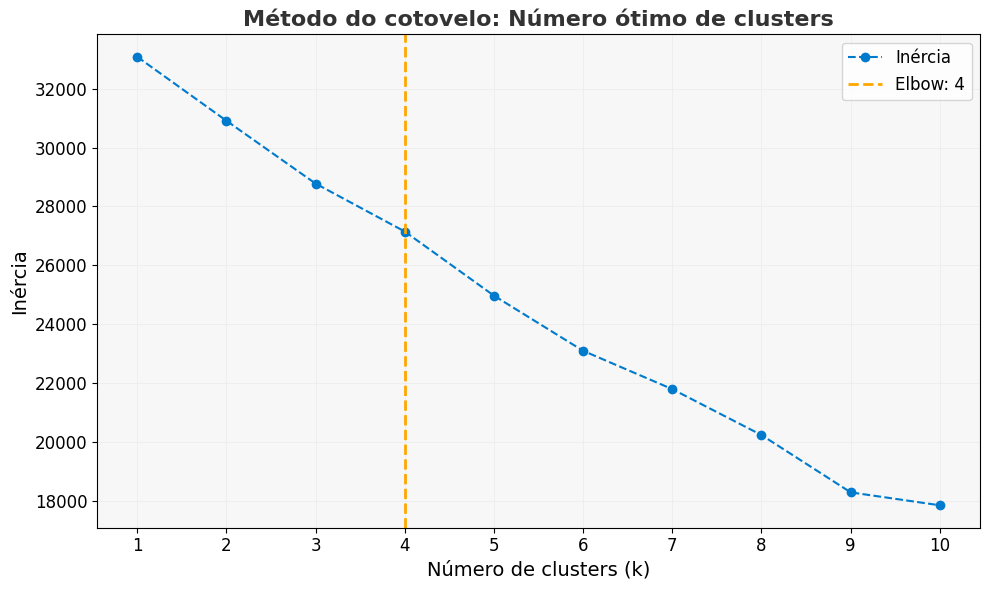

In [12]:
# Cria uma lista para armazenar os valores de inércia para cada número de clusters
inertia = []

# Define o intervalo de valores de k (número de clusters)
k_values = range(1, 11)

# Loop para calcular a inércia para diferentes números de clusters
for k in k_values:
    # Cria o modelo KMeans com o número de clusters k
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=1000, algorithm='elkan', init='k-means++', tol=0.0001)
    
    # Ajusta o modelo aos dados pré-processados
    kmeans.fit(X_preprocessed)
    
    # Adiciona o valor da inércia ao final da lista
    inertia.append(kmeans.inertia_)

# Calcula a diferença da inércia entre números consecutivos de clusters
differences = np.diff(inertia)

# Encontra o ponto de "cotovelo", que é o número de clusters onde a mudança na inércia diminui
elbow_point = np.argmin(differences) + 1

# Cria o gráfico para visualizar o método do cotovelo
plt.figure(figsize=(10, 6))

# Plota os valores de inércia para cada número de clusters
plt.plot(k_values, inertia, marker='o', linestyle='--', color='#007acc', label='Inércia')

# Adiciona uma linha vertical para indicar o ponto do cotovelo
plt.axvline(x=elbow_point, color='#ffa600', linestyle='--', linewidth=2, label=f'Elbow: {elbow_point}')

# Adiciona título e rótulos aos eixos
plt.title('Método do cotovelo: Número ótimo de clusters', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Número de clusters (k)', fontsize=14)
plt.ylabel('Inércia', fontsize=14)

# Ajusta os tamanhos das fontes nos eixos
plt.xticks(k_values, fontsize=12)
plt.yticks(fontsize=12)

# Adiciona uma grade ao gráfico
plt.grid(color='#eaeaea', linestyle='-', linewidth=0.7, alpha=0.7)

# Exibe a legenda
plt.legend(fontsize=12, loc='best')

# Define a cor de fundo do gráfico
plt.gca().set_facecolor('#f7f7f7')

# Ajusta o layout para evitar sobreposição de elementos
plt.tight_layout()

# Exibe o gráfico
plt.show()

### Modelo KMeans com 4 clusters

In [13]:
# Cria um modelo KMeans com 4 clusters e configurações de parâmetros como número máximo de iterações e algoritmo 'elkan'
kmeans = KMeans(n_clusters=4, max_iter=1000, algorithm='elkan', init='k-means++', random_state=42, tol=0.0001)

# Ajusta o modelo KMeans aos dados pré-processados
kmeans.fit(X_preprocessed)

# Adiciona a coluna 'grupo' ao DataFrame original df com as etiquetas dos clusters atribuídos pelo modelo
df['grupo'] = kmeans.labels_

# Adiciona a coluna 'grupo' ao DataFrame de modelo df_model com as etiquetas dos clusters atribuídos
df_model['grupo'] = kmeans.labels_

# Exibe o objeto do modelo KMeans após o ajuste
kmeans

KMeans(algorithm='elkan', max_iter=1000, n_clusters=4, random_state=42)

In [14]:
# Cria um DataFrame com a contagem de ocorrências de cada grupo (cluster) no DataFrame 'df'
pd.DataFrame(df.grupo.value_counts())

,count
grupo,
3,895
2,782
1,499
0,30


In [15]:
# Restaura o DataFrame original a partir do backup criado anteriormente
df = back_up_dataset

# Adiciona a coluna 'Clusters' ao DataFrame com as etiquetas de clusters geradas pelo modelo KMeans
df['Clusters'] = kmeans.labels_

In [16]:
# Salva o DataFrame 'df' com a coluna 'Clusters' em um arquivo CSV, sem incluir o índice
df.to_csv('data/df_with_clusters.csv', index=False)

<img src="https://media.licdn.com/dms/image/v2/D4D03AQGKyH2VYxJFNw/profile-displayphoto-shrink_200_200/B4DZR3AMiKHkAc-/0/1737163329100?e=1742428800&v=beta&t=g3jnt105dxEQvOyv2XAy6EJjviKfFrw1yH61s28JqYk" alt="capa" width="100">

#### [Enzo Schitini](www.linkedin.com/in/enzoschitini)
#### Data Scientist & Data Analyst • Senior Bubble Developer • SQL • Ux/Ui Design 
[*@ Scituffy Founder*](https://scituffy.bubbleapps.io/version-test/index/home)